In [1]:
import pandas as pd  # for easily manipulating databases
import numpy as np  # for numerical computations
import matplotlib.pyplot as plt  # for plotting
import pickle  # pickle is Python's "serialization" package -- used to save and load any python object easily

# Lab: Principal Components Analysis

## The USArrests dataset

We will recreate much of what was shown in lectures on the USArrests dataset, which contains data on p=4 variables (number of murders, assaults, and rapes per 1000 residents, and the urban population of the state, %). Load the dataset and poke around it.

            Murder  Assault  UrbanPop  Rape
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6


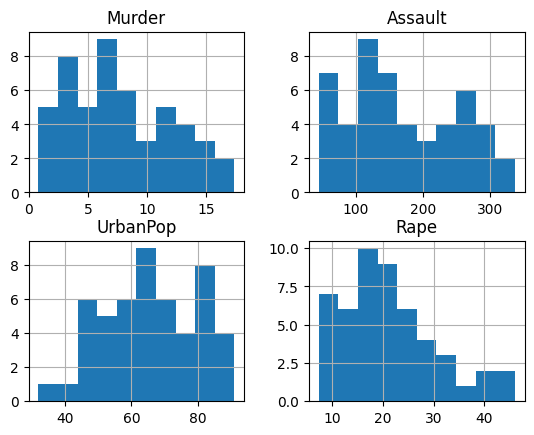

In [2]:
df = pd.read_csv('./USArrests.csv', index_col=0)  # tells Pandas to set the first column in the CSV to the index

print(df.head())

df.hist()
plt.show()

We will first use scikit-learn's PCA module. It is called like all other scikit-learn functions. Remember you should standardize the data before applying PCA.

In [3]:
from sklearn.decomposition import PCA

# standardize the data
X = pd.DataFrame(np.nan, index=df.index, columns=df.columns)  # make an empty container
for col in df.columns:
    X.loc[:, col] = (df[col] - df[col].mean()) / df[col].std()
    
assert not X.isnull().any().any()  # sanity check: this checks that no entries are still null

print(X.head())

# the call signature still follows scikit-learn practices
pca = PCA()
pca.fit(X)

# the scores are the projections of the data down onto the principal components
scores = pca.transform(X)
print(scores)
print(scores.shape)  # so what do you expect the shape to be?

phi = pca.components_  # these are the principal components (i.e., the loading vectors), what do you expect its shape to be? 
print(phi)
print(phi.shape)

              Murder   Assault  UrbanPop      Rape
Alabama     1.242564  0.782839 -0.520907 -0.003416
Alaska      0.507862  1.106823 -1.211764  2.484203
Arizona     0.071633  1.478803  0.998980  1.042878
Arkansas    0.232349  0.230868 -1.073593 -0.184917
California  0.278268  1.262814  1.758923  2.067820
[[ 9.75660448e-01 -1.12200121e+00 -4.39803661e-01 -1.54696581e-01]
 [ 1.93053788e+00 -1.06242692e+00  2.01950027e+00  4.34175454e-01]
 [ 1.74544285e+00  7.38459537e-01  5.42302493e-02  8.26264240e-01]
 [-1.39998944e-01 -1.10854226e+00  1.13422168e-01  1.80973554e-01]
 [ 2.49861285e+00  1.52742672e+00  5.92541000e-01  3.38559240e-01]
 [ 1.49934074e+00  9.77629657e-01  1.08400162e+00 -1.45016417e-03]
 [-1.34499236e+00  1.07798362e+00 -6.36792505e-01  1.17278736e-01]
 [ 4.72298063e-02  3.22088903e-01 -7.11410317e-01  8.73113315e-01]
 [ 2.98275967e+00 -3.88342469e-02 -5.71032063e-01  9.53170415e-02]
 [ 1.62280742e+00 -1.26608838e+00 -3.39018182e-01 -1.06597446e+00]
 [-9.03484479e-01  1.554

### Problem 1

Without using the 'scores' matrix from scikit-learn's functionality above, retrieve the first 2 principal components and create the projection of the dataset down onto the first principal components. Check this against 'scores' to see if you were correct.

Then create a reconstruction of the dataset using only these first two principal components. Compute the error of the reconstruction.

### Solutions

In my below code, see the comments to check the shapes of the various matrices being worked with. I find bookkeeping like this very useful. The projection to Z matches the 'scores' extracted from the scikit-learn method. The reconstructed dataset has an RMSE of 

In [4]:
# project the original dataset down to the first 2 PCs
phi_2 = phi[:2, :]  # first 2 PCs only; you should check the docs to know the PCs are of shape (n_components, n_features)
Z = np.dot(X, phi_2.T)  # (n, p) x (p, 2) --> (n, 2)
print(Z)
print(Z.shape)  # is it the shape you expect?
print(np.isclose(Z - scores[:, :2], 0.0))  # this function checks that all values are close to zero

# Reconstruct the original dataset 
X_pred = np.dot(Z, phi_2)  # (n, 2) x (2, p) --> (n, p)
print(X_pred)
print(X_pred.shape)
print(X - X_pred)  # see the errors in your reconstruction
print(np.sqrt(np.mean((X - X_pred)**2)))  # RMSE gives you a sense of the error on the original (standarized) data scale

[[ 0.97566045  1.12200121]
 [ 1.93053788  1.06242692]
 [ 1.74544285 -0.73845954]
 [-0.13999894  1.10854226]
 [ 2.49861285 -1.52742672]
 [ 1.49934074 -0.97762966]
 [-1.34499236 -1.07798362]
 [ 0.04722981 -0.3220889 ]
 [ 2.98275967  0.03883425]
 [ 1.62280742  1.26608838]
 [-0.90348448 -1.55467609]
 [-1.62331903  0.20885253]
 [ 1.36505197 -0.67498834]
 [-0.50038122 -0.15003926]
 [-2.23099579 -0.10300828]
 [-0.78887206 -0.26744941]
 [-0.74331256  0.94880748]
 [ 1.54909076  0.86230011]
 [-2.37274014  0.37260865]
 [ 1.74564663  0.42335704]
 [-0.48128007 -1.45967706]
 [ 2.08725025 -0.153835  ]
 [-1.67566951 -0.6259067 ]
 [ 0.98647919  2.36973712]
 [ 0.68978426 -0.26070794]
 [-1.17353751  0.53147851]
 [-1.25291625 -0.1920044 ]
 [ 2.84550542 -0.76780502]
 [-2.35995585 -0.01790055]
 [ 0.17974128 -1.43493745]
 [ 1.96012351  0.14141308]
 [ 1.66566662 -0.81491072]
 [ 1.11208808  2.20561081]
 [-2.96215223  0.59309738]
 [-0.22369436 -0.73477837]
 [-0.30864928 -0.28496113]
 [ 0.05852787 -0.53596999]
 

## Visualizing PCA with a biplot

While there are packages out there that can make plots of the principal components for you, here is some custom code to create similar ``biplots'' to the ones we saw in lecture. 

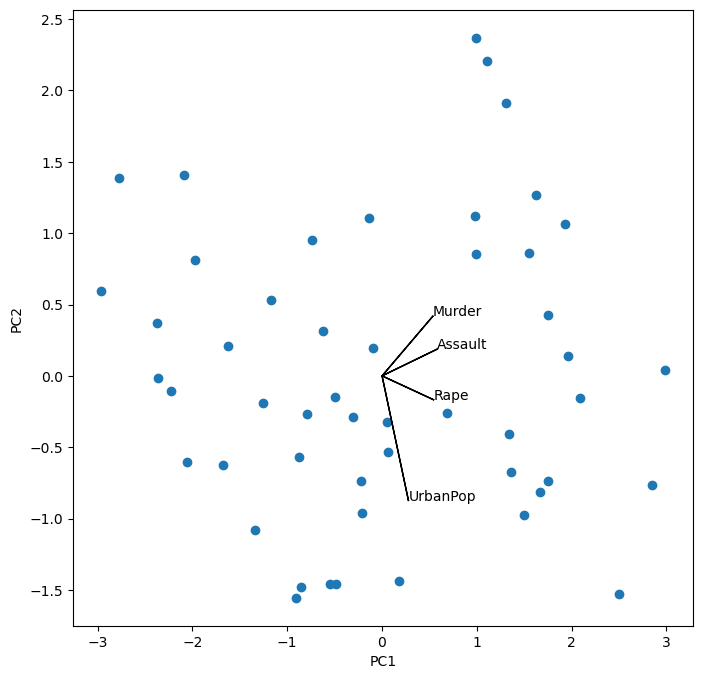

In [5]:
i, j = 0, 1 # which components
fig , ax = plt. subplots (1, 1, figsize =(8, 8))
ax.scatter(scores[:, 0], scores[: ,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pca.components_.shape[1]):
    ax.arrow(0, 0, pca.components_[i,k], pca.components_[j,k])
    ax.text(pca.components_[i,k], pca.components_[j,k], df.columns[k])

plt.show()

## Variance explained and the scree plot

The following code also shows you how to extract the variance explained (which note means this is the way to extract the eigenvalues) and variance explained ratios. You may use these to construct the scree plots we also saw in lecture. Note the use of 'cumsum()' to compute a cumulative sum across an array.

[2.48024158 0.98976515 0.35656318 0.17343009]
[0.62006039 0.24744129 0.0891408  0.04335752]


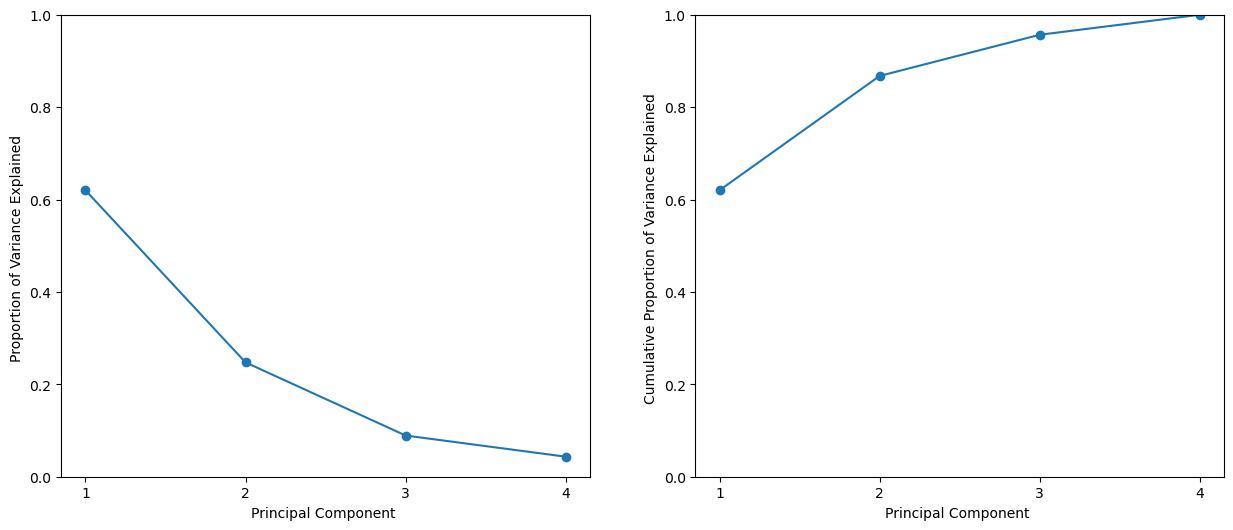

In [6]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

fig , axes = plt.subplots (1, 2, figsize=(15 , 6))
ticks = np.arange(pca.n_components_) + 1

ax = axes[0]
ax.plot(ticks, pca.explained_variance_ratio_, marker='o')
ax.set_xlabel('Principal Component ')
ax.set_ylabel('Proportion of Variance Explained ')
ax.set_ylim([0 ,1])
ax.set_xticks(ticks)

ax = axes [1]
ax.plot(ticks, pca.explained_variance_ratio_.cumsum(), marker='o')
ax.set_xlabel('Principal Component ')
ax.set_ylabel('Cumulative Proportion of Variance Explained ')
ax.set_ylim ([0, 1])
ax.set_xticks(ticks)

## PCA with missing data

In my opinion, one of the best ways to ensure you understand an algorithm is to code it up. Code up the PCA with missing data algorithm from lecture. Below, a pseudo-data matrix is first made with one variable per row randomly removed (as was done in the example from lecture). You can use this matrix to test your code. 

In this exercise, we will also get some experience defining functions (also called 'methods') in Python. This is how you define a function to be called again and again later. If this is new to you, check out the next two cells to see how these functions can be used. Python is very intuitive.

In [15]:
def fill_one_col(X_array):
    """
    The following function takes a 2D numpy array X and, for each row, randomly fills one of the entries of that row with np.nan.
    """
    n, p = X_array.shape
    X_ = X_array.copy()  # makes a copy of X (note that in Python you must make a copy, since all variables are "pointers" to the same object in memory)
    for i_ in range(n):
        var_to_remove = np.random.choice(p)  # randomly sample one of {0, 1, ..., p}; to be used as a 0-index
        X_[i_, var_to_remove] = np.nan
    return X_

In [20]:
# For the rest of the lab, it is easiest to work only with Numpy dataframes
X_ = X.values  # converts to a simple numpy array

# Test out the function
X_masked = fill_one_col(X_)

print(X_masked)
print(X_masked.shape)

[[ 1.24256408         nan -0.52090661 -0.00341647]
 [ 0.50786248  1.10682252         nan  2.48420294]
 [        nan  1.47880321  0.99898006  1.04287839]
 [ 0.23234938  0.23086801 -1.07359268         nan]
 [ 0.27826823         nan  1.7589234   2.06782029]
 [        nan  0.39885929  0.86080854  1.86496721]
 [-1.030419           nan  0.79172279 -1.08174077]
 [        nan  0.8068381   0.446294   -0.57994629]
 [        nan  1.97077766  0.99898006  1.13896669]
 [ 2.20685994  0.48285493         nan  0.48770152]
 [-0.5712305  -1.49704226  1.20623733         nan]
 [        nan -0.60908837 -0.79724965 -0.75076995]
 [        nan  0.93883125  1.20623733  0.29552492]
 [-0.13500142 -0.69308401 -0.03730631         nan]
 [-1.28297267         nan -0.58999237 -1.06038781]
 [        nan -0.66908525  0.03177945 -0.34506377]
 [ 0.43898421 -0.74108152         nan -0.5265639 ]
 [        nan  0.93883125  0.03177945  0.10334831]
 [-1.3059321          nan -1.00450692 -1.43406455]
 [        nan  1.55079947  0.10

### Problem 2

Now code up the PCA with missing data algorithm. I have provided a call signature for you to use and helped you to get started.

In [ ]:
def pca_with_missing_values(X_w_miss, M=2):
    """
    M is the numhber of principal components to use. M must be less than min(X.shape[0] - 1, X.shape[1])
    """
    n, p = X_w_miss.shape
    assert M <= min([n - 1, p])

    # record where all the NaNs are 
    X_is_nan = np.isnan(X_w_miss)  # this creates an array of the same shape as X_w_miss with 'True' flags everywhere there is a NaN

    """
    When the time comes, you can update the missing values in 'X_w_miss' with their corresponding values in 'X_new' easily using this 
    boolean array like so:
    
        X_w_miss[X_is_nan] = X_new[X_is_nan]

    Similarly, to get all the values that are not NaN, you can do:

        X_w_miss[~ X_is_nan]

    Because the symbol ~ flips all the boolean values.
    """

    ### Initializing the algorithm ###
    
    # Compute the feature specific means on the observed data.
    feature_means = np.zeros(p)
    for j_ in range(p):
        X_j = X_w_miss[:, j_]
        X_j_notna = X_j[~ np.isnan(X_j)]
        feature_means[j_] = np.mean(X_j_notna)
    print("feature means:", feature_means)

    # create the pseudo data matrix with missing values filled in
    X_tilde = X_w_miss.copy()  # make a copy of the array (remember in Python you MUST use copy!)
    for i_ in range(n):
        for j_ in range(p):
            
            # check if this entry was NaN
            if np.isnan(X_w_miss[i_, j_]):
                X_tilde[i_, j_] = feature_means[j_]  # fill it in with the correct feature-specific mean

    ### The main part of the algorithm ###
    
    # iterate until the change in objective is very small
    objective = 1
    change_in_objective = 1
    while change_in_objective > 1e-6:

        # compute a PCA of X_tilde
        pca = PCA()  # create a new object every time
        pca.fit(X_tilde)
        phi = pca.components_[:M, :]  # keep only the first M principal components

        # create the reconstruction of the dataset using this PCA
        # isn't this the X where it has no missing value? but what if we don't have it?
        Z = np.dot(X, phi.T)  # (n, p) x (p, M) --> (n, M)
        X_pred = np.dot(Z, phi)  # (n, M) x (M, p) --> (n, p)

        # fill in the missing values with their updated estimates
        X_tilde[X_is_nan] = X_pred[X_is_nan]

        # compute the objective on the observed values
        new_objective = np.sum((X_w_miss[~ X_is_nan] - X_pred[~ X_is_nan]) ** 2)

        change_in_objective = np.abs(new_objective - objective)
        objective = new_objective

        print("Completed an iteration. The objective is", objective)

    return X_tilde

In [36]:
# Run the algorithm
X_filled = pca_with_missing_values(X_masked, M=1)

# check out the reconstruction error
print(np.sqrt(np.mean((X_ - X_filled)**2)))

# Run with a larger M and see if the error improves
X_filled = pca_with_missing_values(X_masked, M=3)
print(np.sqrt(np.mean((X_ - X_filled)**2)))

feature means: [-0.03024904  0.04601275  0.05595946  0.05751757]
Completed an iteration. The objective is 56.88716984624894
Completed an iteration. The objective is 55.39508319735353
Completed an iteration. The objective is 55.324387932586276
Completed an iteration. The objective is 55.33797416949933
Completed an iteration. The objective is 55.346704551315455
Completed an iteration. The objective is 55.35007565199592
Completed an iteration. The objective is 55.35120288564954
Completed an iteration. The objective is 55.35154601604768
Completed an iteration. The objective is 55.35163908486967
Completed an iteration. The objective is 55.35165904199041
Completed an iteration. The objective is 55.35166033158351
Completed an iteration. The objective is 55.351658230052166
Completed an iteration. The objective is 55.35165634740652
Completed an iteration. The objective is 55.35165517020107
Completed an iteration. The objective is 55.35165452263635
0.3208636023661247
feature means: [-0.03024904 